<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science -  Modelo Regressão Linear II</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pandas

https://pandas.pydata.org/

In [60]:
import pandas as pd

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso *dataset* é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Dist_Praia</b> - Distância do imóvel até a praia (km) (em linha reta)</li>
    <li><b>Dist_Farmacia</b> - Distância do imóvel até a farmácia mais próxima (km) (em linha reta)</li>
</ul>

## Leitura dos dados

In [61]:
dados = pd.read_csv('dataset.csv', sep=';')

## Visualizar os dados

In [62]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


## Verificando o tamanho do dataset

In [63]:
dados.shape

(5000, 4)

# <font color='red' style='font-size: 30px;'>1.3 Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas - describe( )

In [64]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [65]:
dados.corr().round(4)
# o objetivo é observar qual a correlação entre as variáveis e a direção da correlação

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


# <font color='red' style='font-size: 30px;'>2.1 Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [66]:
import seaborn as sns

## Configurações de formatação dos gráficos

In [67]:
# palette -> Accent, Accent_r, 
# Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, 
# CMRmap, CMRmap_r, Dark2, Dark2_r, 
# GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r,
# OrRd, OrRd_r, Oranges, Oranges_r, 
# PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r,
# PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, 
# RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, 
# Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, 
# Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, 
# afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r,
# cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, 
# flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, 
# gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, 
# gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, 
# icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

sns.set_palette("Accent")
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")



## Box plot da variável *dependente* (y)

<img width='700px' src='Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

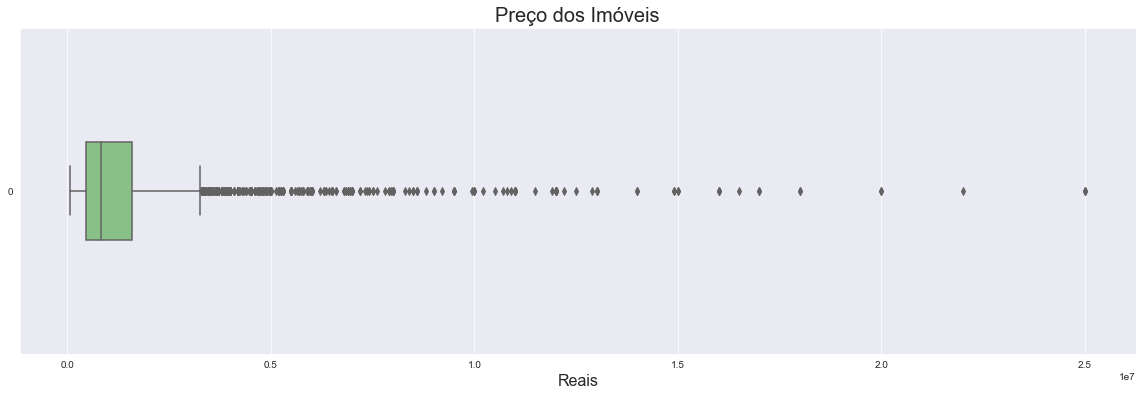

In [68]:
ax = sns.boxplot(data = dados["Valor"], 
                         orient = "h", 
                         width = 0.3)


ax.figure.set_size_inches(20, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

#concentração de valores mais próxima de 0

# <font color='red' style='font-size: 30px;'>2.2 Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

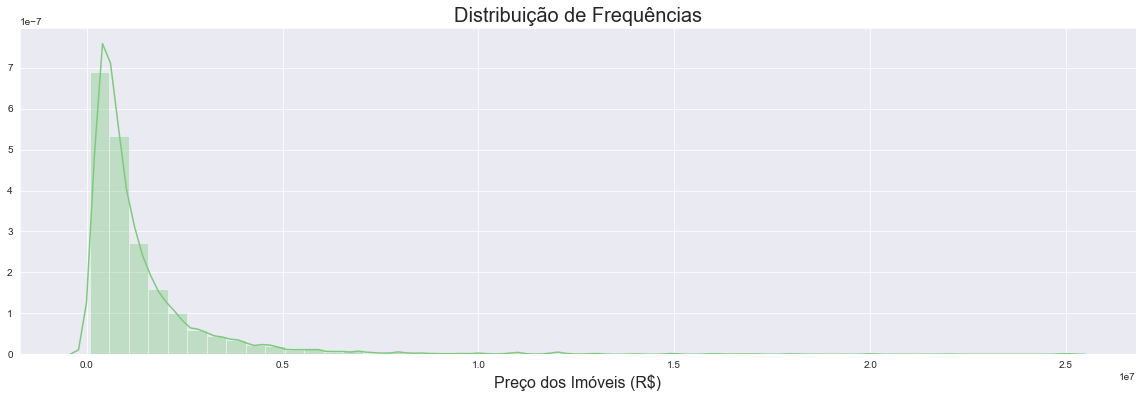

In [69]:
ax = sns.distplot(dados["Valor"])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

<img width='800px' src='Box-Plot II.png'>

# <font color='red' style='font-size: 30px;'>2.3 Dispersão Entre as Variáveis</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

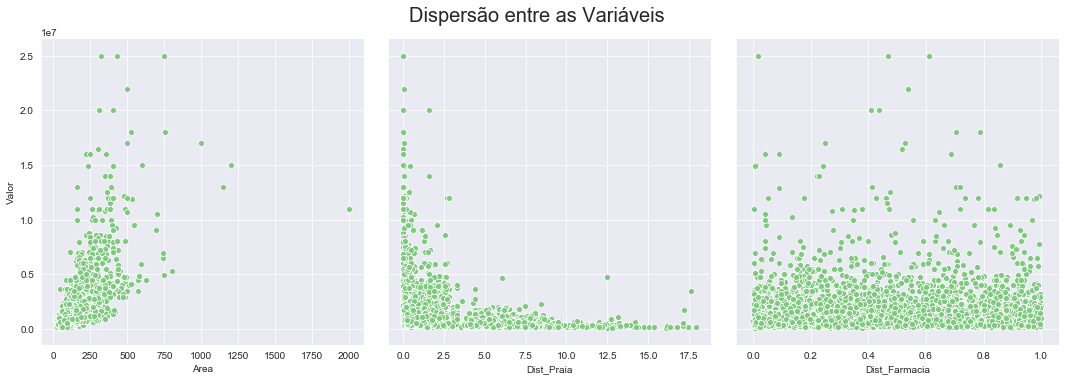

In [70]:
ax = sns.pairplot(dados, y_vars ="Valor", x_vars = ["Area", "Dist_Praia", "Dist_Farmacia"], height = 5 )
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax


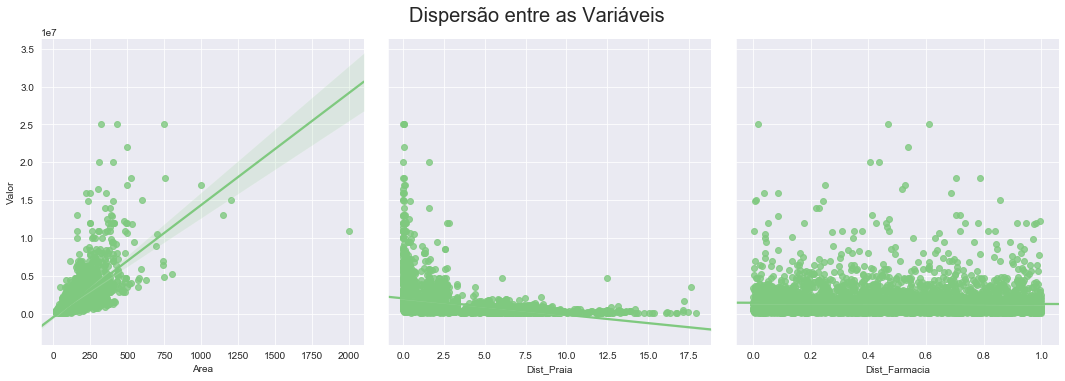

In [71]:
# Adicionando reta de regressão.
# Aparentemente deste modo a variação da variável não é explicativa, as relações lineares praticamente não existem
ax = sns.pairplot(dados, y_vars ="Valor", x_vars = ["Area", "Dist_Praia", "Dist_Farmacia"], height = 5, kind = "reg")
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 30px;'>3.1 Transformando os Dados - Transformação Logarítimica </font>
<hr style='border: 2px solid red;'>

## Distribuição Normal
<hr>

### Por quê? 
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Testes paramétricos assumem que os dados amostrais foram coletados de uma população com distribuição de probabilidade conhecida. Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal (t de Student, intervalos de confiança etc.).</p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando biblioteca numpy

In [72]:
import numpy as np

# Aplicando a transformação logarítmica aos dados do *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [73]:
np.log(1)

0.0

In [74]:
# Passando logartimo para cada variável

dados["log_Valor"] = np.log(dados["Valor"] + 1)
dados["log_Area"] =  np.log(dados["Area"] + 1)
dados["log_Dist_Praia"] = np.log(dados["Dist_Praia"] + 1)
dados["log_Dist_Farmacia"] = np.log(dados["Dist_Farmacia"] + 1)

In [75]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.638355,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710151,5.342334,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.141664,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217675,4.615121,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.105945,0.214916,0.175946


## Distribuição de frequências da variável *dependente transformada* (y)

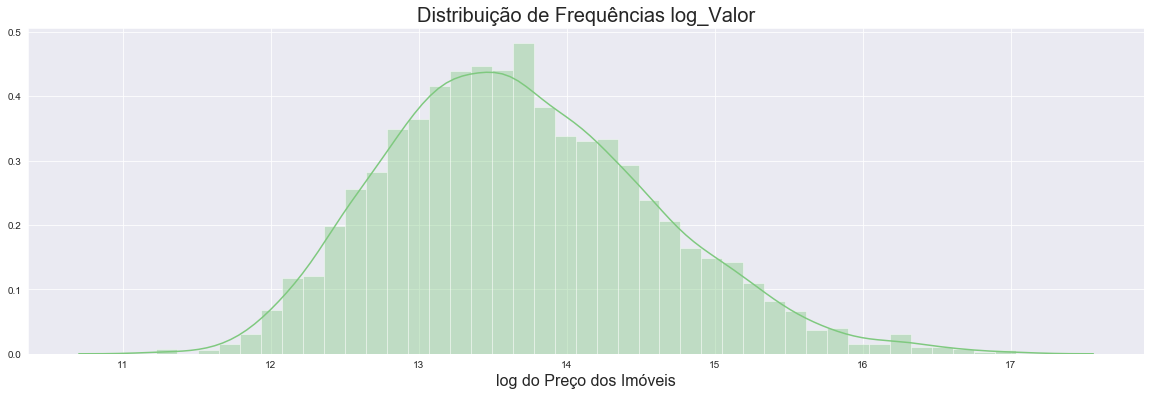

In [76]:
ax = sns.distplot(dados["log_Valor"])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências log_Valor', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>3.2 Verificando Relação Linear com log()</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis transformadas do dataset

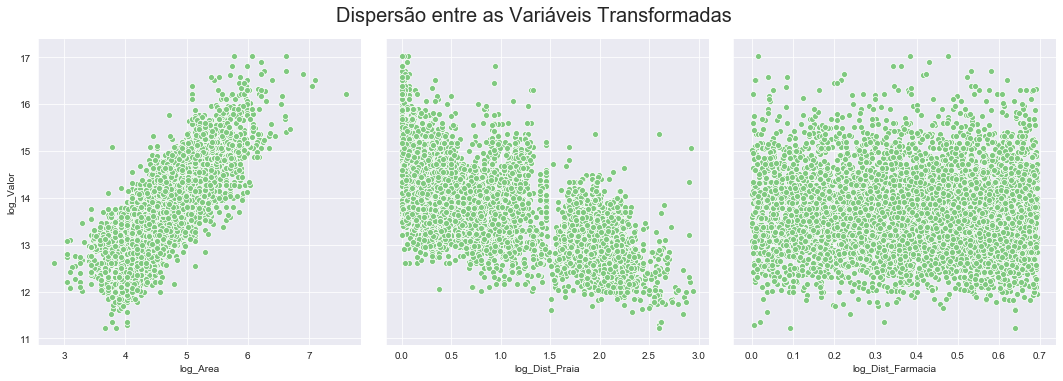

In [77]:
ax = sns.pairplot(dados, y_vars ="log_Valor", x_vars = ["log_Area", "log_Dist_Praia", "log_Dist_Farmacia"], height = 5)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)

ax

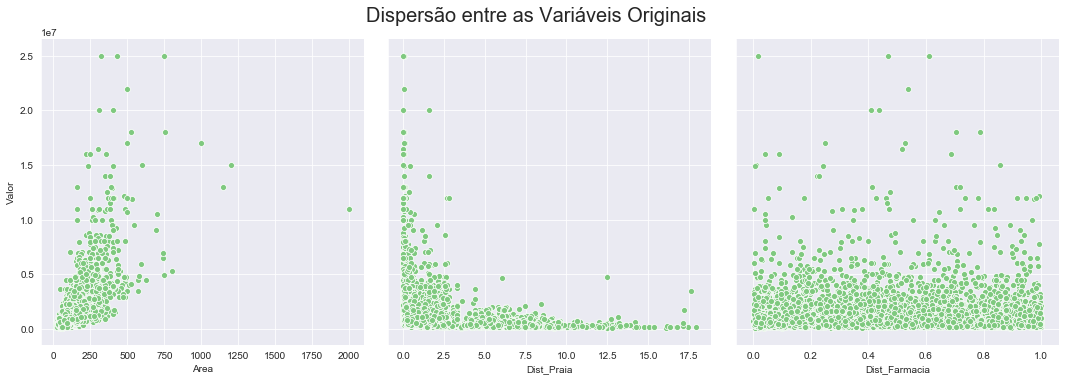

In [78]:
ax = sns.pairplot(dados, y_vars ="Valor", x_vars = ["Area", "Dist_Praia", "Dist_Farmacia"], height = 5 )
ax.fig.suptitle('Dispersão entre as Variáveis Originais', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 30px;'>4.1 Criando os *Datasets* de Treino e Teste</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [79]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Preço dos Imóveis (y)

In [80]:
y = dados["log_Valor"]
y

0       15.341567
1       13.710151
2       14.751604
3       13.217675
4       14.603968
          ...    
4995    13.507627
4996    13.710151
4997    13.592368
4998    12.154785
4999    13.217675
Name: log_Valor, Length: 5000, dtype: float64

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [81]:
X = dados[["log_Area", "log_Dist_Praia", "log_Dist_Farmacia"]]
X

,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,5.638355,0.215857,0.584245
1,5.342334,0.644028,0.126187
2,5.141664,0.057821,0.352991
3,4.615121,1.356655,0.422036
4,5.105945,0.214916,0.175946
...,...,...,...
4995,4.262680,0.391608,0.561266
4996,4.859812,2.261189,0.314935
4997,4.262680,0.225651,0.351647
4998,4.025352,2.297093,0.519367


## Criando os datasets de treino e de teste

In [82]:
# Ordem do output de train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



<img width='800px' src='Log-linear.png'>

---

<img width='800px' src='stat.png'>

# Melhores conclusões de Testes de Hipóteses

## Importando a biblioteca statsmodels 


https://www.statsmodels.org/stable/index.html

In [83]:
import statsmodels.api as sm

## Estimando o modelo com statsmodels

In [84]:
X_train_com_constante = sm.add_constant(X_train)
#dataframe a adicionar a constante

In [85]:
X_train_com_constante

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
4163,1.0,4.356709,1.642350,0.570139
1612,1.0,4.564348,1.981144,0.289759
4327,1.0,3.931826,1.946928,0.564517
210,1.0,4.564348,0.468237,0.422267
45,1.0,4.025352,2.153226,0.089517
...,...,...,...,...
2434,1.0,5.771441,0.393671,0.276853
3080,1.0,4.219508,2.214785,0.637803
4147,1.0,4.454347,0.778619,0.399523
1013,1.0,3.931826,2.220770,0.553445


In [86]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

# <font color='red' style='font-size: 30px;'>4.2 Avaliando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

# OLS Regression Results

## Resumo estatístico de teste do modelo

In [87]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     5630.
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        08:32:07   Log-Likelihood:                -1976.8
No. Observations:                4000   AIC:                             3962.
Df Residuals:                    3996   BIC:                             3987.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3180      0.060    155.333      0.000       9.200       9.436
log_Area              1.0584      0.012     90.269      0.000       1.035       1.081
log_Dist_Praia       -0.4879      0.009    -57.372      0.000      -0.505      -0.471
log_Dist_Farmacia    -0.0022      0.031     -0.070      0.944      -0.063       0.059
==============================================================================
Omnibus:                       65.117   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.160
Skew:                           0.109   Prob(JB):                     1.62e-25
Kurtosis:                       3.799   Cond. No.                         48.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<img width='600px' src='ft.png'>

A biblioteca statsmodels fornece um conjunto mais amplo de estatísticas de testes em seus outputs. Vamos dar ênfase aos testes F e t.

-  O teste F é utilizado para testar simultaneamente a significância de um conjunto de parâmetros.


- O teste t é utilizado para testar a significância de cada parâmetro individualmente.

# <font color='red' style='font-size: 30px;'>4.3 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

### Removendo a variável dist_farmacia  p>|t| > 0.05

In [88]:
X = dados [["log_Area", "log_Dist_Praia"]]

## Criando os datasets de treino e de teste - NOVAMENTE

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2911)

## Estimando o modelo com o statsmodels NOVAMENTE

In [90]:
X_train_com_constante = sm.add_constant(X_train)

## Avaliando as estatísticas de teste do novo modelo

In [91]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [92]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     7820.
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        08:32:07   Log-Likelihood:                -2055.8
No. Observations:                4000   AIC:                             4118.
Df Residuals:                    3997   BIC:                             4137.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3731      0.060    155.266      0.000       9.255       9.491
log_Area           1.0461      0.012     86.228      0.000       1.022       1.070
log_Dist_Praia    -0.4903      0.009    -56.554      0.000      -0.507      -0.473
==============================================================================
Omnibus:                       72.072   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.012
Skew:                           0.153   Prob(JB):                     8.70e-27
Kurtosis:                       3.791   Cond. No.                         47.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# <font color='red' style='font-size: 30px;'>5.1 Estimando o Modelo com os Dados de Treino</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics # Para obtermos o R² para predizer bem as observações

## Instanciando a classe *LinearRegression()*

In [94]:
modelo = LinearRegression()

<img width='600px' src='linear.PNG'>

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [95]:
modelo.fit(X_train, y_train) # Passar quem é o X de trieno e y de treino para TREINAMENTO fit()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [96]:
print("R² = {}".format(modelo.score(X_train, y_train).round(3))) # Retornar o R² deste ajuste

# Retornou mesmo valor do StatsModel:

R² = 0.796


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [97]:
y_previsto = modelo.predict(X_test) 
# Queremos fazer as previsões do modelo estimado com os dados de treino, mas agora estimando com os dados de teste

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [98]:
print("R =  %s" % metrics.r2_score(y_test, y_previsto).round(3))
# Calcular uma estatística, que seria R² também, para dizer ser o valor Previsto está próximo do valor Real (X_test)

R =  0.824


In [99]:
print("R = {}".format(metrics.r2_score(y_test, y_previsto).round(3)))

R = 0.824


# <font color='red' style='font-size: 30px;'>5.2 Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [100]:
entrada = X_test[0:1] # Retornando primeiro registro dos dados de X teste e usar para previsão
entrada

,log_Area,log_Dist_Praia
1211,3.178054,0.473809


## Gerando previsão pontual

In [101]:
modelo.predict(entrada)[0] # elemento inicial deste Array

# Esta previsão de valor está em escala logarítmica - Inverter esta trasformação com função exponencial

12.46531171980837

## Invertendo a transformação para obter a estimativa em R$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [102]:
np.exp(modelo.predict(entrada)[0]) # Realizaando a inversão da transformação realizada anteriormente

259188.71891492954

## Criando um simulador simples

In [107]:
Area = 250 # Metros Quadrados
Dist_Praia = 1 # Kilometro 
entrada = [[np.log(Area), np.log(Dist_Praia + 1)]] 


# Para um imovel de 250 m², com distância de 1 Km da Praia, temos uma estimativa de valor em:
print("R$ {0:2f}".format(np.exp(modelo.predict(entrada)[0])))

R$ 2701128.065130


# <font color='red' style='font-size: 30px;'>5.3 Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo - Efeito das variáveis individuais

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Preço do Imóveis) tendo todas as variáveis explicativas excluídas do modelo. No caso do modelo log-linear este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em R$.</p>

O efeito do intercepto é o efeito médio do preço dos imóveis tirando o efeito das outras variáveis do modelo.

In [108]:
modelo.intercept_

9.373095982411229

In [109]:
np.exp(modelo.intercept_) # Valor médio retirado todo os outros efeitos das variáveis

11767.490693510756

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$ e $\beta_3$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares. Estes tipos de coeficientes medem a elasticidade da variável dependente y em relação as variáveis explicativas X. </b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, é que os coeficientes angulares $\beta_2$ e $\beta_3$ medem as elasticidades de Y em relação a $X_2$ e $X_3$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$ e $X_3$.</p>

In [110]:
modelo.coef_

array([ 1.04608794, -0.49029933])

## Confirmando a ordem das variáveis explicativas no DataFrame

In [111]:
X.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [112]:
index = ['Intercepto', 'Área (m²)', 'Distância Praia (km)']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [117]:
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns=['Parâmetros'])

,Parâmetros
Intercepto,9.373096
Área (m²),1.046088
Distância Praia (km),-0.490299


# Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Preço dos Imóveis seria de <b>R$ 11.767,49</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Mantendo-se o valor de $X_3$ (Distância até a Praia) constante, um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de <b>1.05%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distância até a Praia (km)</b> → Mantendo-se o valor de $X_2$ (Área) constante, um acréscimo de 1% na Distância de um imóvel até a praia gera, em média, um decréscimo de <b>0.49%</b> no Preço do Imóvel.
</p>

<img width='800px' src='alternativa.PNG'>

# <font color='red' style='font-size: 30px;'>5.4 Análises Gráficas dos Resultados do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [118]:
y_previsto_train = modelo.predict(X_train) #Passar o X_treino p/ realizar previsões da variável dependente

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

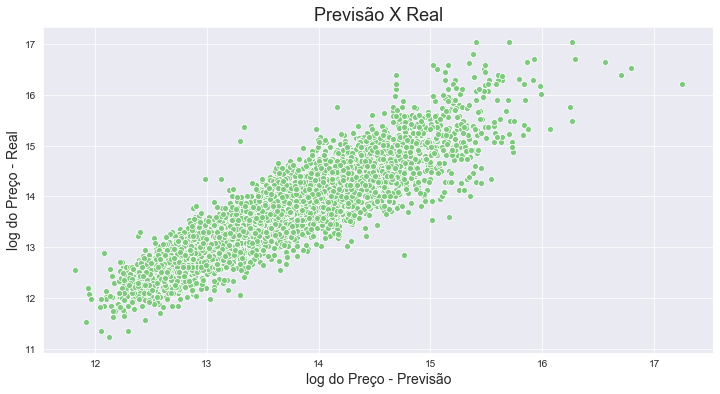

In [122]:
ax = sns.scatterplot(x = y_previsto_train, y = y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

# A ideia deste gráfico é que tenhamos uma reta, quanto menos dispersão, melhor será a estimativa, menor o erro estimado

## Obtendo os resíduos

In [125]:
residuo = y_train - y_previsto_train

## Plotando a distribuição de frequências dos resíduos

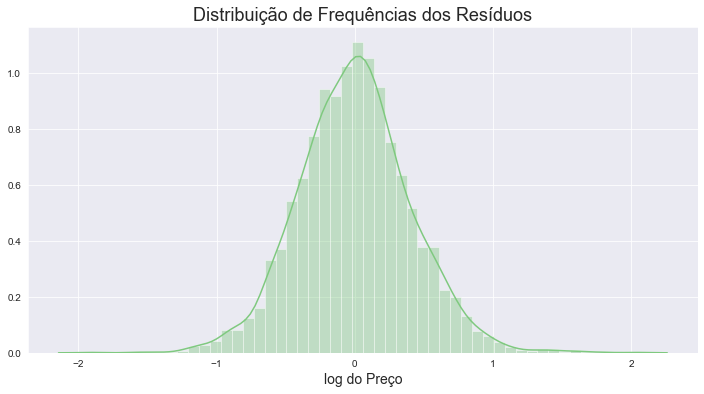

In [126]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax